<a href="https://colab.research.google.com/github/aksevenli/Pytorch-Reinforcement-Learning/blob/master/PolicyGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Policy Gradient
In each step, it samples an action from the policy based on the **probabilities** computed using the state and weight. It no longer takes an action with certainty, in contrast with random search and hill climbing (by taking the action achieving the higher score). Hence, the policy switches from deterministic to stochastic.


In [0]:
import gym
import torch

In [0]:
env = gym.make('CartPole-v0')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

We define the *run_episode* function, which simulates an episode given the input weight and returns the total reward and the gradients computed. More specifically, it does the following tasks in each step:


*   Calculates the probabilities, **probs**, for both actions based on the current state and input weight
*   Samples an **action**, based on the resulting probabilities
*   Computes the derivatives, **d_softmax**, of the **softmax** function with the probabilities as input
*   Divides the resulting derivatives, d_softmax, by the probabilities, probs, to get the derivatives, **d_log**, of the log term with respect to the policy
*   Applies the chain rule to compute the gradient, grad, of the weights
*   Records the resulting gradient, grad
*   Performs the action, accumulates the reward, and updates the state



In [0]:
def run_episode(env, weight):
    state = env.reset()
    grads = []
    total_reward = 0
    is_done = False
    while not is_done:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)
        # Softmax function, a wonderful activation function that turns numbers aka 
        # logits into probabilities that sum to one. Softmax function outputs a vector that represents 
        # the probability distributions of a list of potential outcomes.
        probs = torch.nn.Softmax()(z)
        action = int(torch.bernoulli(probs[1]).item())
        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]
        grad = state.view(-1, 1) * d_log # .view(-1,1) preventing broadcasting
        # If there is any situation that you don't know how many rows you want but are sure of the number of columns, 
        # then you can specify this with a -1. (Note that you can extend this to tensors with more dimensions. Only one 
        # of the axis value can be -1). This is a way of telling the library: "give me a tensor that has these many columns and you 
        # compute the appropriate number of rows that is necessary to make this happen".
        grads.append(grad)
        state, reward, is_done, _ = env.step(action)
        total_reward += reward
        if is_done:
            break
    return total_reward, grads

In [27]:
n_episode = 1000

weight = torch.rand(n_state, n_action)
total_rewards = []

# Update the weight using the computed gradients at the end of each eposide
# For every step of the episode, the weight moves by learning rate * gradient calculated
# in this step * total reward in the remaining steps
learning_rate = 0.001

for episode in range(n_episode):
    total_reward, gradients = run_episode(env, weight)
    print('Episode {}: {}'.format(episode + 1, total_reward))
    for i, gradient in enumerate(gradients):
        weight += learning_rate * gradient * (total_reward - i)
    total_rewards.append(total_reward)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Episode 1: 18.0
Episode 2: 19.0
Episode 3: 21.0
Episode 4: 27.0
Episode 5: 22.0
Episode 6: 36.0
Episode 7: 35.0
Episode 8: 30.0
Episode 9: 22.0
Episode 10: 32.0
Episode 11: 127.0
Episode 12: 63.0
Episode 13: 56.0
Episode 14: 75.0
Episode 15: 18.0
Episode 16: 28.0
Episode 17: 17.0
Episode 18: 106.0
Episode 19: 67.0
Episode 20: 20.0
Episode 21: 36.0
Episode 22: 88.0
Episode 23: 96.0
Episode 24: 136.0
Episode 25: 46.0
Episode 26: 62.0
Episode 27: 90.0
Episode 28: 46.0
Episode 29: 98.0
Episode 30: 100.0
Episode 31: 64.0
Episode 32: 77.0
Episode 33: 133.0
Episode 34: 130.0
Episode 35: 176.0
Episode 36: 200.0
Episode 37: 134.0
Episode 38: 123.0
Episode 39: 137.0
Episode 40: 105.0
Episode 41: 117.0
Episode 42: 103.0
Episode 43: 127.0
Episode 44: 157.0
Episode 45: 200.0
Episode 46: 168.0
Episode 47: 108.0
Episode 48: 200.0
Episode 49: 183.0
Episode 50: 200.0
Episode 51: 200.0
Episode 52: 200.0
Episode 53: 91.0
Episode 54: 73.0
Episode 55: 200.0
Episode 56: 200.0
Episode 57: 200.0
Episode 58: 1

In [28]:
print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards) / n_episode))

Average total reward over 1000 episode: 172.093


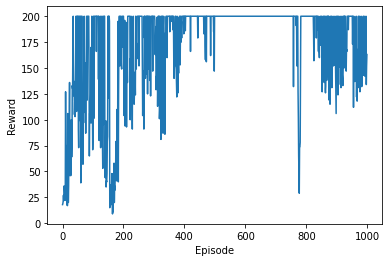

In [29]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In the resulting plot, we can see a clear upward trend before it stays at the maximum value. We can also see that the rewards oscillate even after it converges. This is because the policy gradient algorithm is a stochastic policy

Now, let's see how the learned policy performs on 100 new episodes:


In [30]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, _ = run_episode(env, weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    total_rewards_eval.append(total_reward)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Episode 1: 200.0
Episode 2: 200.0
Episode 3: 200.0
Episode 4: 128.0
Episode 5: 152.0
Episode 6: 195.0
Episode 7: 164.0
Episode 8: 184.0
Episode 9: 135.0
Episode 10: 126.0
Episode 11: 111.0
Episode 12: 121.0
Episode 13: 200.0
Episode 14: 137.0
Episode 15: 107.0
Episode 16: 131.0
Episode 17: 124.0
Episode 18: 157.0
Episode 19: 128.0
Episode 20: 200.0
Episode 21: 146.0
Episode 22: 200.0
Episode 23: 200.0
Episode 24: 153.0
Episode 25: 132.0
Episode 26: 182.0
Episode 27: 146.0
Episode 28: 168.0
Episode 29: 170.0
Episode 30: 179.0
Episode 31: 134.0
Episode 32: 130.0
Episode 33: 122.0
Episode 34: 144.0
Episode 35: 200.0
Episode 36: 200.0
Episode 37: 200.0
Episode 38: 172.0
Episode 39: 200.0
Episode 40: 137.0
Episode 41: 121.0
Episode 42: 177.0
Episode 43: 166.0
Episode 44: 200.0
Episode 45: 148.0
Episode 46: 117.0
Episode 47: 152.0
Episode 48: 154.0
Episode 49: 200.0
Episode 50: 127.0
Episode 51: 158.0
Episode 52: 153.0
Episode 53: 145.0
Episode 54: 178.0
Episode 55: 150.0
Episode 56: 200.0
E

In [31]:
print('Average total reward over {} episode:{}'.format(n_episode, sum(total_rewards) / n_episode))

Average total reward over 1000 episode:172.093


The policy gradient algorithm trains an agent by taking small steps and updating the weight based on the rewards associated with those steps at the end of an episode. *The technique of having the agent run through an entire episode and then updating the policy based on the rewards obtained is called Monte Carlo policy gradient.* The action is selected based on the probability distribution computed based on the current state and the model’s weight. 

For example, if the probabilities for the left and right actions
are [0.6, 0.4], this means the left action is selected 60% of the time; it doesn't mean the left action is chosen, as in the random search and hill-climbing algorithms.

We know that the reward is 1 for each step before an episode terminates. Hence, the future reward we use to calculate the policy gradient at each step is the number of steps remaining. **After each episode, we feed the gradient history multiplied by the future rewards to update the weight using the stochastic gradient ascent method**. In this way, the longer an episode is, the bigger the update of the weight. This will eventually increase the chance of getting a larger total reward.

As we mentioned at the start of this section, the policy gradient algorithm might be overkill for a simple environment such as CartPole, but it should get us ready for more complicated problems.